#APRENDIZAJE AUTOMÁTICO
Métricas de Evaluación


Integrantes: +Sigrid Segura +Víctor Garro Abarca


---



Resumen: En este trabajo se hará un estudio teórico y práctico de cada una de las métricas usadas en los diferentes modelos de aprendizaje, tanto para el caso de regresión como para el caso de clasificación.


---

### CONTENIDO

> MÉTRICAS DE REGRESIÓN
* 1.3.1 Error absoluto medio
* 1.3.2 Error cuadrático medio
* 1.3.3 Cálculo del valor R cuadrado
* 1.3.4 Desviación cuadrática media de la raíz


> MÉTRICAS DE CLASIFICACIÓN
* Matriz de confusión
* 2.2.1 Accuracy / Exactitud
* 2.2.2 Precisión
* 2.2.3 Recall / Sensibilidad
* 2.2.4 Puntaje de F1
* 2.2.5 Curva ROC (Característica Operativa del Receptor)
* 2.2.6 AUC (Area bajo la curva)

--------------------------------------------------------------------------------

## 1 MÉTRICAS DE REGRESIÓN

1.1. Se importa la Biblioteca

In [ ]:
  from sklearn import datasets
  from sklearn import tree, model_selection
  from sklearn.model_selection import train_test_split

1.2. Se configuran los datos

In [ ]:
  seed = 42
  dataset = datasets.load_wine()
  X = dataset.data
  y = dataset.target
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  kfold = model_selection.KFold(n_splits=10, random_state=None)

1.3. Entrenando el Modelo y calculando Metricas

In [ ]:
model = tree.DecisionTreeRegressor()

Ahora calcularemos diferentes métricas. Usaremos el puntaje de validación cruzada para calcular las métricas. Entonces estaremos imprimiendo la media y la desviación estándar de todos los puntajes.

### 1.3.1 Error absoluto medio

El error absoluto medio, o MAE, es una métrica popular porque, como RMSE, las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice. A diferencia de RMSE, los cambios en RMSE son lineales y, por lo tanto, intuitivos.

Es decir, MSE y RMSE castigan los errores más grandes que los errores más pequeños, inflando o magnificando la puntuación de error media. Esto se debe al cuadrado del valor de error. El MAE no da más o menos peso a los diferentes tipos de errores y, en cambio, las puntuaciones aumentan linealmente con los aumentos del error.

Como sugiere su nombre, la puntuación MAE se calcula como el promedio de los valores de error absoluto. Absoluto o abdominales() es una función matemática que simplemente hace que un número sea positivo. Por lo tanto, la diferencia entre un valor esperado y predicho puede ser positiva o negativa y está obligada a ser positiva al calcular el MAE.

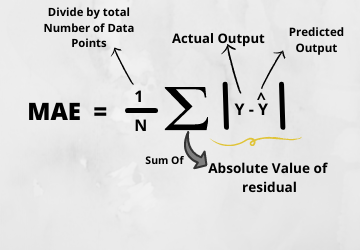

In [ ]:
  scoring = "neg_mean_absolute_error"
  results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  print("Error absoluto medio MAE: ", results.mean()); print("Desviación Estandar: ", results.std())

Error absoluto medio MAE:  -0.03736263736263736
Desviación Estandar:  0.05082343331800957


### 1.3.2 Error medio cuadrado

> Bloque con sangría



Cálculo del error cuadrático medio
Mean Squared Error, o MSE para abreviar, es una métrica de error popular para problemas de regresión. También es una función de pérdida importante para los algoritmos ajustados u optimizados utilizando el marco de mínimos cuadrados de un problema de regresión. Aquí «mínimos cuadrados”Se refiere a minimizar el error cuadrático medio entre las predicciones y los valores esperados.
El MSE se calcula como la media o el promedio de las diferencias al cuadrado entre los valores objetivo predichos y esperados en un conjunto de datos.

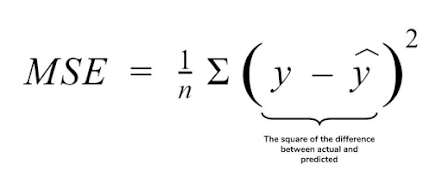

In [ ]:
  scoring = "neg_mean_squared_error"
  results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  print(); print("Error cuadrático medio MSE: ", results.mean()); print("Desviación Estandar: ", results.std())


Error cuadrático medio MSE:  -0.03736263736263736
Desviación Estandar:  0.03741108688032792


### 1.3.3 Cálculo del valor R cuadrado

El R2 es el porcentaje de variación de la variable de respuesta que explica su relación con una o más variables predictoras. Por lo general, mientras mayor sea el R2, mejor será el ajuste del modelo a sus datos. El R2 siempre se encuentra entre 0 y 100%

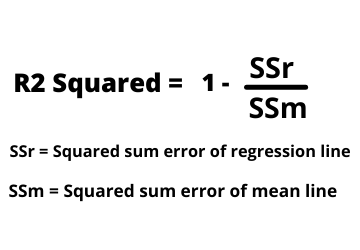

In [ ]:
  scoring = "r2"
  results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  print(); print("Valor R cuadrado R2: ", results.mean()); print("Desviación Estandar: ", results.std())


Valor R cuadrado R2:  0.9074786324786326
Desviación Estandar:  0.08262890472845574


### 1.3.4 Desviación cuadrática media de la raíz

Comparación de los valores obtenidos con el b original

Para comparar los resultados obtenidos se utiliza la raíz de la distancia media cuadrática (Root-mean-square deviation o RMSD). RMSD es una medida muy utilizada de las diferencias entre los valores de la muestra o población y los valores predichos por un modelo o un estimador.

El RMSD de un estimador ${\hat {\theta }}$ con respecto a un parámetro estimado ${{\theta }}$ se define como la raíz cuadrada del error medio cuadrado:

RMSE (o RMSD)= $\sqrt{MSE({\hat {\theta }})}$ = $\sqrt{\frac{ \sum_{i=1}^{n}(\hat y_{i}-y_{i})^{2}}{n}}$

Con $\hat y_{i}$ que representa el i-esimo valor predicho y $y_{i}$ el i-esimo valor conocido de las n muestras.



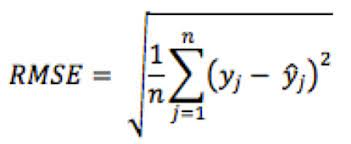

In [ ]:
  import math
  scoring = "neg_root_mean_squared_error"
  results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  print(); print("Error cuadrático medio de la Raiz RMSE: ", results.mean()); print("Desviación Estandar: ", results.std())
  
  
  


Error cuadrático medio de la Raiz RMSE:  -0.13564839219625022
Desviación Estandar:  0.1356934062795945


---------------------------------------------------------------------------

## 2. MÉTRICAS DE CLASIFICACION

### 2.1 Matriz de Confusion

La librería Scikit-Learn proporciona funciones para obtener una matriz de confusión de forma sencilla.

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = [1, 1, 1, 0, 1, 0]
y_pred = [1, 1, 0, 1, 0, 0]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()


### 2.2 Principales Métricas de clasificación

A partir de estos valores que obtenemos de la matriz de confusión, podemos obtener diferentes métricas que nos permitirán evaluar nuestro modelo. A continuación hablaremos de las métricas más comunes.

### 2.2.1 Accuracy / Exactitud

La traducción de accuracy al español sería precisión, pero ya que hay otra métrica que también tiene la misma traducción, he optado por dejarlo en inglés. La métrica accuracy representa el porcentaje total de valores correctamente clasificados, tanto positivos como negativos.

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Es recomendable utilizar esta métrica en problemas en los que los datos están balanceados, es decir, que haya misma cantidad de valores de cada etiqueta (en este caso mismo número de 1s y 0s).

Utilizando el ejemplo anterior, tendríamos un accuracy de 3/6, es decir 50%. Utilizando Scikit-Learn podemos calcularlo de forma muy sencilla.



In [ ]:
from sklearn.metrics import accuracy_score
Exactitud = accuracy_score(y_true, y_pred)
print(Exactitud)

0.5


### 2.2.2 Precisión

La métrica de precisión es utilizada para poder saber qué porcentaje de valores que se han clasificado como positivos son realmente positivos.

Precision = TP / (TP + FP)

Siguiendo con el mismo ejemplo, tendríamos una precision de 2/3, es decir 66,6%. Calcular esta métrica también es muy sencillo.

In [ ]:
from sklearn.metrics import precision_score
Presicion=precision_score(y_true, y_pred)
print(Presicion)

0.6666666666666666


### 2.2.3 Recall / Sensibilidad

La métrica de recall, también conocida como el ratio de verdaderos positivos, es utilizada para saber cuantos valores positivos son correctamente clasificados.

Recall = TP / (TP + FN)

Siguiendo el ejemplo, tendríamos un recall de 2/4, es decir 50%.

In [ ]:
from sklearn.metrics import recall_score
Sensibilidad=recall_score(y_true, y_pred)
print(Sensibilidad)

0.5


### 2.2.4 Puntaje de F1

Esta es una métrica muy utilizada en problemas en los que el conjunto de datos a analizar está desbalanceado. Esta métrica combina el precision y el recall, para obtener un valor mucho más objetivo.

F1 = 2 * ((recall * precision)/(recall + precision))

Siguiendo el mismo ejemplo, tendríamos un F1 de 2 * ((0,50 * 0,666)/(0,50 + 0,666)), que da como resultado 57,1%.



In [ ]:

from sklearn.metrics import f1_score
Puntaje=f1_score(y_true, y_pred)
print(Puntaje)

0.5714285714285715


### 2.2.5 Curva ROC (Característica Operativa del Receptor)

Una curva ROC (Receiver Operating Characteristic) es un gráfico muy utilizado para evaluar modelos de Machine Learning para problemas de clasificación. La gráfica representa el porcentaje de verdaderos positivos (True Positive Rate), también conocido como Recall, contra el ratio de falsos positivos (False Positive Rate). La diferencia con el resto de métricas, es que en este caso, el umbral por el que se clasifica un elemento como 0 o 1, se va modificando, para poder ir generando todos los puntos de la gráfica. En este otro post te explicamos más en detalle todo el potencial de esta curva.


En este caso, vamos a modificar un poco las predicciones, para que se pueda apreciar de mejor forma la gráfica.

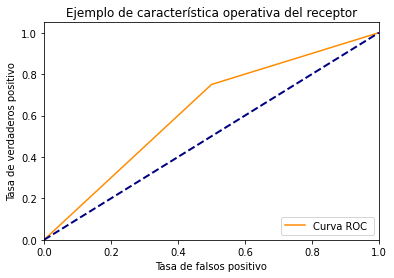

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_true = [1, 1, 1, 0, 1, 0]
y_pred = [1, 1, 0, 1, 1, 0]
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='Curva ROC ')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivo')
plt.ylabel('Tasa de verdaderos positivo')
plt.title('Ejemplo de característica operativa del receptor')
plt.legend(loc="lower right")
plt.show()

### 2.2.6 AUC (Area bajo la curva)

A partir de la gráfica anterior, se puede obtener una métrica sólida, muy útil para problemas de clasificación binaria. Esta métrica es el AUC (Area Under Curve), que significa, el área bajo la curva. El valor de esta métrica se encuentra en un rango entre 0 y 1, donde 0 es como si tuviéramos un modelo aleatorio, es decir, que si tiraramos los dados al aire tendríamos mejor resultado, y 1 es un resultado óptimo que indica que nuestro modelo generaliza muy bien.

Calcular esta métrica no es tan sencillo como las otras, ya que entraría en juego el cálculo de integrales, por lo que podemos utilizar de nuevo la librería Scikit-Learn para calcularlo de forma sencilla.

In [ ]:
Lis

0.625